# Label all the Analogies using GPT-4

In [1]:
import openai
from tqdm import tqdm
import csv
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt

RATE_LIMIT = .5  # 1 request per 2 seconds
with open("../../../openai_valid.key", 'r') as inputfile:
    apiKey = inputfile.readline().strip()  # Reads the first line (API key)
    orgKey = inputfile.readline().strip()  # Reads the second line (optional)
    projKey = inputfile.readline().strip()  # Reads the third line (optional)

# Set the OpenAI API key
openai.api_key = apiKey
# And set organization and project keys if applicable
openai.organization = orgKey
openai.project = projKey

In [2]:
def prompt_model(prompt):
    response = openai.chat.completions.create(
        model="gpt-4o",
        max_tokens=100,
        temperature=0,
        messages=[
            {"role": "user", "content": prompt},
        ],   
    )
    return(response.choices[0].message.content)

Loading the annotation prompt

In [3]:
with open("../../data/labeling_promptv3.txt", "r") as f_in:
    label_prompt = "".join(f_in.readlines())

### Settings

In [4]:
# Settings
annotator = "gpt-4"
categories = ["Physical Action", "Directional Metaphor", "Cultural/Convention", "Interactive Entities", "No Analogy/Explanation"]

## Labeling: Human Analogies

In [5]:
path = '../../data/human_results/'
file_name = 'EXP_% - Research Study on Analogies (Responses) - Form Responses 1.csv'

counter = 1
meta_data = {}
for cond in ["A", "B" ,"C"]:
    file_named = file_name.replace("%", cond)
    print(file_named, " ... read.")
    with open(path + file_named, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = line.split(',')
            age = int(line[4])
            gender = line[5]
            region = line[3]
            meta_data[counter] = [age, gender, region]
            counter += 1

EXP_A - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_B - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_C - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.


In [6]:
data_a = {
    "wanted": [[],[],[]],
    "pulled": [[],[],[]],
    "increased": [[],[],[]],
    "impacted": [[],[],[]],
    "respected": [[],[],[]],
    "pushed": [[],[],[]],
    "lifted": [[],[],[]],
    "owned": [[],[],[]],
    "argued with": [[],[],[]],
    "walked": [[],[],[]]
}

data_b = {
    "fled": [[],[],[]],
    "pointed at": [[],[],[]],
    "succeeded": [[],[],[]],
    "hunted": [[],[],[]],
    "warned": [[],[],[]],
    "smashed": [[],[],[]],
    "perched": [[],[],[]],
    "bombed": [[],[],[]],
    "hoped": [[],[],[]],
    "gave to": [[],[],[]]
}

data_c = {
    "showed": [[],[],[]],
    "floated": [[],[],[]],
    "flew": [[],[],[]],
    "obeyed": [[],[],[]],
    "rested": [[],[],[]],
    "rushed": [[],[],[]],
    "regretted": [[],[],[]],
    "sank": [[],[],[]],
    "offended": [[],[],[]],
    "tempted": [[],[],[]]
}

def split_preserve_sentences(line):
    return next(csv.reader([line], skipinitialspace=True))

# load data files
for cond in ["A", "B" ,"C"]:
    file_named = file_name.replace("%", cond)
    print(file_named, " ... read.")
    
    with open(path + file_named, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = split_preserve_sentences(line)
            
            if cond == "A":
                incr = 0
                for key in data_a.keys():
                    pos = 7 + incr
                    data_a[key][0].append(line[pos])
                    data_a[key][1].append(line[pos-1])
                    incr += 2
            elif cond == "B":
                incr = 0
                for key in data_b.keys():
                    pos = 7 + incr
                    data_b[key][0].append(line[pos])
                    data_b[key][1].append(line[pos-1])
                    incr += 2
            elif cond == "C":
                incr = 0
                for key in data_c.keys():
                    pos = 7 + incr
                    data_c[key][0].append(line[pos])
                    data_c[key][1].append(line[pos-1])
                    incr += 2
           

EXP_A - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_B - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_C - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.


In [7]:
data_dict = {**data_a, **data_b, **data_c}

In [8]:
data_dict

{'wanted': [['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
  ['circle wants square. as circle is first its on the left, furthermore the arrow should point towards the square as it shows circle acting towards square',
   'The arrow to the right elicits something like pursuit - circle wants square so circle goes and gets it. D feels similar, but more causal.  ',
   "The arrow pointing from the circle to the square indicates the circle 'needing' the square, and the left to right follows a logical timeline/direction of thought.",
   'When you want something you move towards it, hence an arrow towards the thing you want. Preferably horizontally as gravity complicates the analogy.',
   'The arrow originating from the circle designates desire.',
   'Because the circle moved to the object it "wanted\', it takes the action. however C and D seem to represent the same as A',
   'An arrow is like pointing to something. Image A is like a child pointing to something it wants.',
   'Wanting is active stat

### STOP HERE

In [8]:
do not proceed

SyntaxError: invalid syntax (675216605.py, line 1)

In [8]:
for item, values in tqdm(data_dict.items()):
    choices = values[0]
    analogies = values[1]

    labels = []
    for analogy in analogies:
        prompt = label_prompt.replace("[EXPLANATION]", "Explanation: "+analogy)
        response = prompt_model(prompt)
        if response in categories:
            labels.append(response)
        else:
            labels.append("ERROR")
            print("Label could not be assigned. Assigned label: ", response)
    data_dict[item][2] = labels
    

100%|██████████| 30/30 [05:03<00:00, 10.12s/it]


In [9]:
results_path = "results/analogy_labels/annotated_human_analogies_"+annotator+".txt"

In [123]:
results_path = "results/analogy_labels/annotated_human_analogies_"+annotator+".txt"

with open(results_path, "w") as f:
    for k, values in data_dict.items():
        f.write(k+"\t")
        f.write(", ".join(values[0])+"\t")
        f.write(" ||| ".join(values[1])+"\t")
        f.write(", ".join(values[2])+"\t")
        f.write("\n")

### CONTINUE HERE

In [9]:
results_path = "results/analogy_labels/annotated_human_analogies_"+annotator+".txt"
data_dict = {}

def read_labels_from_file(data, path):
    with open(path, "r") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) < 4:  # Ensure the expected format
                continue
            key = parts[0]
            values_0 = parts[1].split(", ") if parts[1] else []
            values_1 = parts[2].split(" ||| ") if parts[2] else []
            values_2 = parts[3].split(", ") if parts[3] else []
            data[key] = [values_0, values_1, values_2]

read_labels_from_file(data_dict, results_path)

In [10]:
data_dict

{'wanted': [['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
  ['circle wants square. as circle is first its on the left, furthermore the arrow should point towards the square as it shows circle acting towards square',
   'The arrow to the right elicits something like pursuit - circle wants square so circle goes and gets it. D feels similar, but more causal.  ',
   "The arrow pointing from the circle to the square indicates the circle 'needing' the square, and the left to right follows a logical timeline/direction of thought.",
   'When you want something you move towards it, hence an arrow towards the thing you want. Preferably horizontally as gravity complicates the analogy.',
   'The arrow originating from the circle designates desire.',
   'Because the circle moved to the object it "wanted\', it takes the action. however C and D seem to represent the same as A',
   'An arrow is like pointing to something. Image A is like a child pointing to something it wants.',
   'Wanting is active stat

# Labeling LLM Analogies

In [33]:
path_to_llm_results = "results/llms/"

model_paths = ["gpt" , "llama", "reasoning"] 

files_per_model = {}
for model_path in model_paths:

    files = [f for f in listdir(path_to_llm_results+model_path) if isfile(join(path_to_llm_results+model_path, f))]
    relevant_files = [f for f in files if f.startswith("generated") and f.endswith("analogy.txt") and "70b_refl" not in f]
    relevant_files.extend([f for f in files if f.startswith("generated") and model_path=="zeroshot" and "70b_refl" not in f])
    

    files_per_model[model_path] = relevant_files

print(files_per_model)

{'gpt': ['generated_answers_pseudo_4-mini_analogy.txt', 'generated_answers_text_4-mini_analogy.txt', 'generated_answers_pseudo_4_analogy.txt', 'generated_answers_text_4_analogy.txt', 'generated_answers_text_3.5_analogy.txt', 'generated_answers_pseudo_3.5_analogy.txt'], 'llama': ['generated_answers_text_70b_analogy.txt', 'generated_answers_text_r1-llama_analogy.txt', 'generated_answers_pseudo_70b_inst_analogy.txt', 'generated_answers_pseudo_70b_analogy.txt', 'generated_answers_text_70b_inst_analogy.txt', 'generated_answers_pseudo_r1-llama_analogy.txt'], 'reasoning': ['generated_answers_pseudo_o1-preview_analogy.txt', 'generated_answers_text_o1-preview_analogy.txt']}


In [35]:

analogies_per_model = {}
for model_name, file_names in files_per_model.items():
    analogies_per_model[model_name] = {} 
    # analogies_per_model['gpt-3']

    for file_name in file_names:
        condition = file_name.replace("generated_answers_","").replace("_analogy.txt","")
        analogies_per_model[model_name][condition] = {}
        # analogies_per_model['gpt-3']['pseudo_4-mini']

        pth2file = path_to_llm_results + model_name + "/" + file_name
        print(pth2file)

        with open(pth2file, "r") as f:
            lines = [line.strip() for line in f.readlines() if re.match(r"^[a-z]", line) and not line.startswith(("c", "ana"))]
            current_action = lines[0].split('\t')[0]
            current_analogs= []
        
            for line in lines:
                action = line.split('\t')[0]
                try:
                    analogy = line.split('\t')[2].replace("analogy: ","")
                except IndexError:
                    print(line)
                    break
                if action != current_action:
                    analogies_per_model[model_name][condition][current_action] = current_analogs
                    current_analogs = [analogy]
                    current_action = action
                else:
                    current_analogs.append(analogy)
            analogies_per_model[model_name][condition][current_action] = current_analogs
#analogies_per_model['gpt']['text_4']

results/llms/gpt/generated_answers_pseudo_4-mini_analogy.txt
results/llms/gpt/generated_answers_text_4-mini_analogy.txt
results/llms/gpt/generated_answers_pseudo_4_analogy.txt
results/llms/gpt/generated_answers_text_4_analogy.txt
results/llms/gpt/generated_answers_text_3.5_analogy.txt
results/llms/gpt/generated_answers_pseudo_3.5_analogy.txt
results/llms/llama/generated_answers_text_70b_analogy.txt
results/llms/llama/generated_answers_text_r1-llama_analogy.txt
results/llms/llama/generated_answers_pseudo_70b_inst_analogy.txt
results/llms/llama/generated_answers_pseudo_70b_analogy.txt
results/llms/llama/generated_answers_text_70b_inst_analogy.txt
results/llms/llama/generated_answers_pseudo_r1-llama_analogy.txt
results/llms/reasoning/generated_answers_pseudo_o1-preview_analogy.txt
results/llms/reasoning/generated_answers_text_o1-preview_analogy.txt


### STOP HERE

In [ ]:
do not run the next cell

In [54]:
def write_labels_to_file(data, path):
    with open(path, "w") as f:
        
        for k, values in data.items():
            f.write(k+"\t")
            f.write(" ||| ".join(values[0])+"\t")
            f.write(", ".join(values[1])+"\t")
            f.write("\n")

In [26]:
from copy import deepcopy
labels_per_model = deepcopy(analogies_per_model)

for model_name, file_names in analogies_per_model.items():
    print("Model: ", model_name)
    for condition, data in file_names.items():
        print("Condition: ", condition)
        # analogies_per_model['gpt-3']['pseudo_4-mini']

        for action, analogies in tqdm(data.items()):
            labels = []
            for analogy in analogies:
                prompt = label_prompt.replace("[EXPLANATION]", "Explanation: "+analogy)
                response = prompt_model(prompt)
                if response in categories:
                    labels.append(response)
                else:
                    labels.append("ERROR")
                    print("Label could not be assigned. Assigned label: ", response)

            labels_per_model[model_name][condition][action] = [analogies,labels]

        print(f"labels_per_model[{model_name}][{condition}]")
        print(analogies_per_model[model_name][condition])
        label_out_path = f"results/analogy_labels/annotated_model_analogies_{model_name}_{condition}.txt"
        write_labels_to_file(labels_per_model[model_name][condition],label_out_path)

        print()

#print(labels_per_model['gpt']['text_4'])

Model:  reasoning
Condition:  pseudo_o1-preview


100%|██████████| 30/30 [07:41<00:00, 15.37s/it]


labels_per_model[reasoning][pseudo_o1-preview]
{'fled': ["Fleeing involves moving away swiftly from a threat or danger. The arrow pointing to the right '→' symbolizes forward motion and escape, representing the act of running away or fleeing.", "'Fleeing' involves quickly moving away from danger or a threat, often in a retreating direction. An arrow pointing to the left '←' symbolizes movement backward or away from an origin point, representing retreat and escape.", "Fleeing involves moving away or retreating quickly from a source of danger or threat. The leftward arrow '←' symbolizes moving backward or away from a point of origin, representing the act of escape or retreat.", 'Analogy:', "'Fleeing' involves moving away or retreating from a situation or danger. The left arrow '←' symbolizes moving backward or away from a point of origin.", "'Fled' involves turning away from something and moving rapidly in the opposite direction to escape danger. It signifies a swift retreat or withdrawa

100%|██████████| 30/30 [07:21<00:00, 14.73s/it]

labels_per_model[reasoning][text_o1-preview]
{'fled': ["The event 'fled' signifies moving away or departing quickly from a location. The word 'left' not only denotes a direction but is also the past tense of 'leave', meaning to depart. Thus, 'left' embodies the action of fleeing.", "'Fled' means someone has escaped or departed quickly from a place or situation. Similarly, 'left' is the past tense of 'leave', indicating someone has departed or gone away. Therefore, 'left' represents the action of fleeing.", "'Fled' means to run away or depart quickly from a place. The word 'left' not only represents a direction but is also the past tense of 'leave', meaning to depart. Therefore, 'left' embodies the concept of someone having departed or escaped.", "'Fled' means to run away or escape from a place or situation. The concept 'left' represents departing or moving away from a location. Therefore, 'left' best represents the event 'fled'.", "'Fled' involves leaving or departing quickly from a pl

### CONTINUE HERE

In [13]:
labels_per_model = {}

for model_name, file_names in files_per_model.items():
    labels_per_model[model_name] = {} 

    for file_name in file_names:
        condition = file_name.replace("generated_answers_","").replace("_analogy.txt","")
        labels_per_model[model_name][condition] = {}


        label_out_path = f"results/analogy_labels/annotated_model_analogies_{model_name}_{condition}.txt"
        with open(label_out_path, "r") as f:

            for line in f.readlines():
                parts = line.strip().split("\t")
                key = parts[0]
                values_1 = parts[1].split(" ||| ") if parts[1] else []
                values_2 = parts[2].split(", ") if parts[2] else []

                
                labels_per_model[model_name][condition][key] = [values_1, values_2]

In [14]:
labels_per_model['gpt']['pseudo_4-mini']

{'fled': [["'fleeing' typically involves a rapid movement away from a threat or danger, often in a direction that is opposite to the source of fear. The upward direction can symbolize an escape or rising above a situation, suggesting a swift departure from danger.",
   "'Fleeing' typically involves moving away quickly from a threat or danger, often in a direction that is opposite to the source of fear. The upward arrow (↑) can symbolize an escape or rising above a situation, suggesting a movement away from danger.",
   "'fleeing' typically involves a rapid movement away from a location or situation, often in a direction that signifies escape. The upward arrow (↑) can symbolize a quick ascent or escape from a lower position, suggesting a swift departure from danger or threat.",
   "'Fleeing' typically involves a rapid movement away from a situation or danger, often in a direction that is opposite to the source of threat. The upward arrow (↑) can symbolize an escape or rising above a sit

# Label VLM Analogies

In [40]:
path_to_vlm_results = "results/vlms/parsed_results/"

model_paths = ["molmo" , "qwen-vl"] 

files_per_model = {}
for model_path in model_paths:

    files = [f for f in listdir(path_to_vlm_results) if isfile(join(path_to_vlm_results, f))]
    relevant_files = [f for f in files if f.endswith("analogies.json") and f.startswith(model_path)]
    files_per_model[model_path] = relevant_files

print(files_per_model)

{'molmo': ['molmo72b-human-analogies.json', 'molmo-human-analogies.json'], 'qwen-vl': ['qwen-vl-human-analogies.json', 'qwen-vl-72b-human-analogies.json']}


In [52]:
import json


analogies_per_vlm_model = {}
for model_name, file_names in files_per_model.items():
    analogies_per_vlm_model[model_name] = {} 
    # analogies_per_model['molmo']

    for file_name in file_names:
        if not '72b' in file_name:
            size = '7b'
        else:
            size = '72b'

        analogies_per_vlm_model[model_name][size] = {}
        # analogies_per_model['molmo']['7B']

        pth2file = path_to_vlm_results + file_name
        print(pth2file)

        with open(pth2file, "r") as f:
            d = json.load(f)
            # d['action']['CODE'] = analogy
            new_dict = {key: list(value.values()) for key, value in d.items()}
            # new_dict['action'] = [analogy1, analogy2, analogy3 ...]
            
        analogies_per_vlm_model[model_name][size] = new_dict

#analogies_per_vlm_model['molmo']['7b']

results/vlms/parsed_results/molmo72b-human-analogies.json
results/vlms/parsed_results/molmo-human-analogies.json
results/vlms/parsed_results/qwen-vl-human-analogies.json
results/vlms/parsed_results/qwen-vl-72b-human-analogies.json


#### STOP HERE

In [ ]:
do not run this cell

In [ ]:
from copy import deepcopy
labels_per_vlm_model = deepcopy(analogies_per_vlm_model)

for model_name, file_names in analogies_per_vlm_model.items():
    print("Model: ", model_name)
    for size, data in file_names.items():
        print("Size: ", size)
        # analogies_per_vlm_model['molmo']['7b']

        for action, analogies in tqdm(data.items()):
            labels = []
            for analogy in analogies:
                prompt = label_prompt.replace("[EXPLANATION]", "Explanation: "+analogy)
                response = prompt_model(prompt)
                if response in categories:
                    labels.append(response)
                else:
                    labels.append("ERROR")
                    print("Label could not be assigned. Assigned label: ", response)

            labels_per_vlm_model[model_name][size][action] = [analogies,labels]

        print(f"labels_per_vlm_model[{model_name}][{size}]")
        print(analogies_per_vlm_model[model_name][size])
        label_out_path = f"results/analogy_labels/annotated_model_analogies_{model_name}_{size}.txt"
        write_labels_to_file(labels_per_vlm_model[model_name][size],label_out_path)

        print()

#print(labels_per_vlm_model['gpt']['text_4'])

Model:  molmo
Size:  72b


100%|██████████| 30/30 [07:32<00:00, 15.08s/it]


labels_per_vlm_model[molmo][72b]
{'fled': [" 'fled' often involves moving away from a starting point in a straight line. This movement can be represented as a vertical arrow pointing downward, symbolizing the rapid departure from one's original position.", " 'fled' often involves moving away from a starting point in a straight line. This movement can be represented as a vertical arrow pointing downward, symbolizing the rapid departure from one's original position.", " 'fled' often involves moving away from a starting point in a straight line. This movement can be represented as a vertical arrow pointing downward, symbolizing the rapid departure from one's original position.", " 'fled' often involves moving away from a starting point in a straight line. This movement can be represented as a vertical arrow pointing downward, symbolizing the rapid departure from one's original position.", " 'fled' often involves moving away from a starting point in a straight line. This movement can be re

100%|██████████| 30/30 [08:44<00:00, 17.47s/it]


labels_per_vlm_model[molmo][7b]
{'fled': [" Analogy: 'fled' typically involves moving away from a location quickly. The direction of movement could be represented as a downward-pointing arrow, suggesting a vertical escape.", " Analogy: 'fled' typically involves moving away from a location quickly. The direction of movement could be represented as a downward-pointing arrow, suggesting a vertical escape.", " Analogy: 'fled' typically involves moving away from a location quickly. The direction of movement could be represented as a downward-pointing arrow, suggesting a vertical escape.", " Analogy: 'fled' typically involves moving away from a location quickly. The direction of movement could be represented as a downward-pointing arrow, suggesting a vertical escape.", " Analogy: 'fled' typically involves moving away from a location quickly. The direction of movement could be represented as a downward-pointing arrow, suggesting a vertical escape.", " Analogy: 'fled' typically involves moving

100%|██████████| 30/30 [07:49<00:00, 15.66s/it]


labels_per_vlm_model[qwen-vl][7b]
{'fled': ["'Fled' implies moving away from something or someone. A person running away from a danger or threat is a common visual representation of this action.", "'Fled' implies moving away from something or someone. A person running away from a danger or threat is a common visual representation of this action.", "'Fled' implies moving away from something or someone. A person running away from a danger or threat is a common visual representation of this action.", "'Fled' implies moving away from something or someone. A person running away from a danger or threat is a common visual representation of this action.", "'Fled' implies moving away from something or someone. A person running away from a danger or threat is a common visual representation of this action.", "'Fled' implies moving away from something or someone. A person running away from a danger or threat is a common visual representation of this action.", "'Fled' implies moving away from somet

100%|██████████| 30/30 [08:36<00:00, 17.22s/it]

labels_per_vlm_model[qwen-vl][72b]
{'fled': ["'fled' often involves escaping or running away from danger. Like a person running away from a predator for example.", "'fled' often involves escaping or running away from a threat. Like a person running away from a predator for example.", "'fled' often involves escaping or running away from danger. Like a person running away from a predator for example.", "'fled' often involves escaping or running away from danger. Like a person running away from a predator for example.", "'fled' often involves escaping or running away from danger. Like a person running away from a predator for example.", "'fled' often involves escaping or running away from danger. A person running away from a predator for example.", "'fled' often involves escaping or running away from a threat. Like a person running away from a predator for example.", "'fled' often involves escaping or running away from a threat. Like a person running away from a predator for example.", "'

In [41]:
import math
from collections import Counter, defaultdict
import numpy as np

# --- Helper Metrics Functions --- #

def item_agreement(labels):
    """
    Given a list of labels for one item (e.g. one word),
    compute the proportion that agree with the mode.
    For example, if labels = [A, A, B, A, C, A, B, A],
    mode frequency is 5 -> agreement=5/8.
    """
    if not labels:
        return 0
    counts = Counter(labels)
    mode_count = max(counts.values())
    return mode_count / len(labels)

def average_agreement(data_dict, label_index):
    """
    Compute the average agreement (mode proportion) across all words.
    data_dict: a dictionary where keys are the words.
      For the human data_dict the labels list is at index "label_index" of the value.
      For example, for human data, label_index should be 2 since
          data_dict[word] = [CHOICES, ANALOGIES, LABELS]
    Returns: average agreement.
    """
    agreements = []
    for word, lists in data_dict.items():
        labels = lists[label_index]
        agreements.append(item_agreement(labels))
    return sum(agreements)/len(agreements) if agreements else 0

def overall_label_distribution(data_dict, label_index):
    """
    Aggregate all labels (for all items/words) into one distribution.
    Returns a dictionary mapping label -> probability.
    """
    all_labels = []
    for word, lists in data_dict.items():
        all_labels.extend(lists[label_index])
    counts = Counter(all_labels)
    total = sum(counts.values())
    return {label: count/total for label,count in counts.items()}

def shannon_entropy_from_distribution(prob_dist):
    """
    Compute Shannon entropy given a probability distribution (dict values sum to 1).
    Uses log base 2.
    """
    entropy = 0
    for p in prob_dist.values():
        if p > 0:
            entropy -= p*math.log2(p)
    return entropy

def js_divergence(p_dist, q_dist):
    """
    Compute the Jensen-Shannon divergence between two distributions.
    
    p_dist and q_dist are dictionaries mapping labels -> probability.
    We first form vectors on the union of all labels.
    """
    # Get union of labels and form vector arrays:
    labels = sorted(set(p_dist.keys()) | set(q_dist.keys()))
    p = np.array([p_dist.get(l, 0) for l in labels])
    q = np.array([q_dist.get(l, 0) for l in labels])
    m = 0.5*(p+q)
    
    def kl_divergence(a, b):
        # Use np.where for entries with a==0 to avoid log(0)
        mask = a > 0
        return np.sum(a[mask] * np.log2(a[mask] / b[mask]))
    
    return 0.5*kl_divergence(p, m) + 0.5*kl_divergence(q, m)

def shannon_entropy_from_distribution(prob_dist):
    """
    Compute the Shannon entropy for a given probability distribution.
    The distribution is provided as a dict with values summing to 1.
    Uses logarithm base 2.
    """
    import math
    entropy = 0
    for p in prob_dist.values():
        if p > 0:
            entropy -= p * math.log2(p)
    return entropy

In [42]:
# For human data, each word is mapped to [CHOICES, ANALOGIES, LABELS]
human_data = data_dict

# For model data, each word is mapped to [ANALOGIES, LABELS]
model_data = labels_per_model

In [43]:
print(labels_per_model.keys())
print(labels_per_model["llama"].keys())


dict_keys(['gpt', 'llama', 'reasoning'])
dict_keys(['text_70b', 'text_r1-llama', 'pseudo_70b_inst', 'pseudo_70b', 'text_70b_inst', 'pseudo_r1-llama'])


In [44]:
# First compute the human aggregated metrics.
human_avg_agreement = average_agreement(human_data, label_index=2)
human_overall_dist = overall_label_distribution(human_data, label_index=2)
human_entropy = shannon_entropy_from_distribution(human_overall_dist)

print("Human Data:")
print("Average item agreement (coherence): {:.2f}".format(human_avg_agreement))
print("Shannon Entropy: {:.2f} bits".format(human_entropy))
print("Overall label distribution:", human_overall_dist)


Human Data:
Average item agreement (coherence): 0.55
Shannon Entropy: 1.76 bits
Overall label distribution: {'Interactive Entities': 0.49583333333333335, 'Physical Action': 0.24583333333333332, 'No Analogy/Explanation': 0.15416666666666667, 'Cultural/Convention': 0.10416666666666667}


In [45]:
# Initialize dictionaries to store computed results.
# For each result we will store a tuple with (avg_agreement, js_divergence)
results_pseudo = {}  # keys: model_name, value: dict mapping condition -> metrics
results_text   = {}

# Iterate through our models and each condition they have.
for model_name, conditions in labels_per_model.items():
    for condition, model_data in conditions.items():
        # Compute the model's internal consistency.
        # For model_data the labels list is at index 1.
        model_avg_agreement = average_agreement(model_data, label_index=1)

        # Compute the overall label distribution and the JS divergence with human.
        model_overall_dist = overall_label_distribution(model_data, label_index=1)
        jsd = js_divergence(human_overall_dist, model_overall_dist)

        # Group results by condition
        if "pseudo" in condition.lower():
            if model_name not in results_pseudo:
                results_pseudo[model_name] = {}
            results_pseudo[model_name][condition] = {
                'agreement': model_avg_agreement,
                'jsd': jsd
            }
        elif "text" in condition.lower():
            if model_name not in results_text:
                results_text[model_name] = {}
            results_text[model_name][condition] = {
                'agreement': model_avg_agreement,
                'jsd': jsd
            }

In [46]:
def aggregate_results(results_dict):
    """Aggregate across multiple conditions for each model by taking the average.
       Input: results_dict is like { model_name: { condition1: {'agreement': x, 'jsd': y},
                                                    condition2: {'agreement': x2, 'jsd': y2} } }
       Returns: two dicts: aggregated_agreement[model_name] and aggregated_jsd[model_name].
    """
    aggregated_agreement = {}
    aggregated_jsd = {}
    for model_name, cond_data in results_dict.items():
        agreements = [val['agreement'] for val in cond_data.values()]
        jsds = [val['jsd'] for val in cond_data.values()]
        aggregated_agreement[model_name] = np.mean(agreements)
        aggregated_jsd[model_name] = np.mean(jsds)
    return aggregated_agreement, aggregated_jsd

aggregated_pseudo_agreement, aggregated_pseudo_jsd = aggregate_results(results_pseudo)
aggregated_text_agreement, aggregated_text_jsd = aggregate_results(results_text)

In [51]:
human_overall_dist = overall_label_distribution(human_data, label_index=2)

pseudo_metrics = {}  # key: desired model label, value: metrics dict
text_metrics = {}

# Process GPT results:
if "gpt" in labels_per_model:
    gpt_mapping = {
      "gpt-3.5": {"pseudo": "pseudo_3.5", "text": "text_3.5"},
      "gpt-4":   {"pseudo": "pseudo_4",   "text": "text_4"},
      "gpt-4-mini": {"pseudo": "pseudo_4-mini", "text": "text_4-mini"}
    }
    for model_label, keys in gpt_mapping.items():
        for cond_type in ["pseudo", "text"]:
            key = keys[cond_type]
            if key in labels_per_model["gpt"]:
                model_data = labels_per_model["gpt"][key]
                metrics = {
                  "agreement": average_agreement(model_data, label_index=1),
                  "divergence": js_divergence(human_overall_dist, overall_label_distribution(model_data, label_index=1)),
                  "entropy": shannon_entropy_from_distribution(overall_label_distribution(model_data, label_index=1))
                }
                if cond_type == "pseudo":
                    pseudo_metrics[model_label] = metrics
                else:
                    text_metrics[model_label] = metrics
            else:
                print(f"Warning: key {key} not found in gpt conditions.")

# Process Llama results:
if "llama" in labels_per_model:
    llama_mapping = {
      "llama-70b": {"pseudo": "pseudo_70b", "text": "text_70b"},
      "llama-70b-inst": {"pseudo": "pseudo_70b_inst", "text": "text_70b_inst"}
    }
    for model_label, keys in llama_mapping.items():
        for cond_type in ["pseudo", "text"]:
            key = keys[cond_type]
            if key in labels_per_model["llama"]:
                model_data = labels_per_model["llama"][key]
                metrics = {
                  "agreement": average_agreement(model_data, label_index=1),
                  "divergence": js_divergence(human_overall_dist, overall_label_distribution(model_data, label_index=1)),
                  "entropy": shannon_entropy_from_distribution(overall_label_distribution(model_data, label_index=1))
                }
                if cond_type == "pseudo":
                    pseudo_metrics[model_label] = metrics
                else:
                    text_metrics[model_label] = metrics
            else:
                print(f"Warning: key {key} not found in llama conditions.")

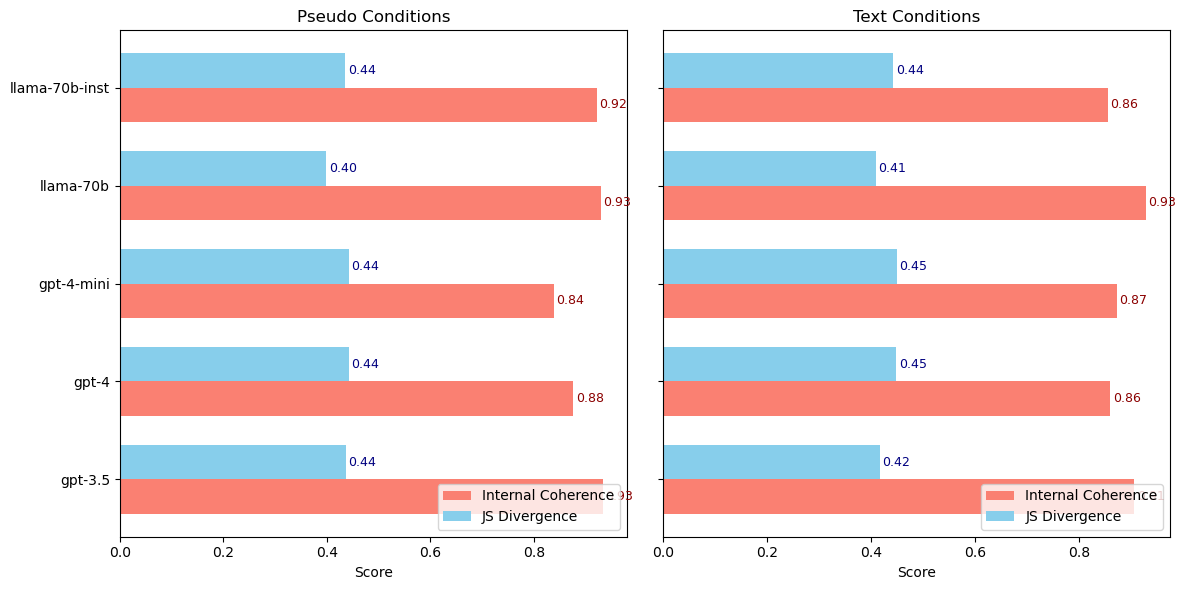

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

def plot_metrics(ax, metrics_dict, title):
    # metrics_dict is assumed to have exactly the 5 models
    models = sorted(metrics_dict.keys())
    n_models = len(models)
    y_positions = np.arange(n_models)
    
    # Retrieve metric values.
    coherence_vals = [metrics_dict[m]["agreement"] for m in models]
    divergence_vals = [metrics_dict[m]["divergence"] for m in models]
    
    # Use grouped bars: shift positions slightly.
    bar_height = 0.35
    y_coherence = y_positions - bar_height/2
    y_divergence = y_positions + bar_height/2
    
    # Plot muted red for internal coherence and muted blue for divergence.
    ax.barh(y_coherence, coherence_vals, height=bar_height, color='salmon', label='Internal Coherence')
    ax.barh(y_divergence, divergence_vals, height=bar_height, color='skyblue', label='JS Divergence')
    
    ax.set_yticks(y_positions)
    ax.set_yticklabels(models)
    ax.invert_yaxis()  # so the first model is at the top
    ax.set_xlabel('Score')
    ax.set_title(title)
    
    # Annotate each bar with its numeric value.
    for i in range(n_models):
        ax.text(coherence_vals[i] + 0.005, y_coherence[i], f"{coherence_vals[i]:.2f}", va='center', fontsize=9, color='darkred')
        ax.text(divergence_vals[i] + 0.005, y_divergence[i], f"{divergence_vals[i]:.2f}", va='center', fontsize=9, color='navy')
                
    ax.legend(loc='lower right')

plot_metrics(axes[0], pseudo_metrics, "Pseudo Conditions")
plot_metrics(axes[1], text_metrics, "Text Conditions")

plt.tight_layout()
plt.show()

In [55]:
import pandas as pd

# Collect rows for each condition with entropy.
rows = []

# Process pseudo condition results.
for model in sorted(pseudo_metrics.keys()):
    rows.append({
        "Model": model,
        "Condition": "Pseudo",
        "Internal Coherence": pseudo_metrics[model]["agreement"],
        "JS Divergence": pseudo_metrics[model]["divergence"],
        "Entropy": pseudo_metrics[model]["entropy"]
    })

# Process text condition results.
for model in sorted(text_metrics.keys()):
    rows.append({
        "Model": model,
        "Condition": "Text",
        "Internal Coherence": text_metrics[model]["agreement"],
        "JS Divergence": text_metrics[model]["divergence"],
        "Entropy": text_metrics[model]["entropy"]
    })

# Add the human reference row.
rows.append({
    "Model": "Human",
    "Condition": "Reference",
    "Internal Coherence": 0.55,
    "JS Divergence": "---",  # not defined for humans
    "Entropy": 1.76
})

results_df = pd.DataFrame(rows)
results_df = results_df.sort_values(by=["Model", "Condition"])

# Round the numeric values for display.
results_df["Internal Coherence"] = results_df["Internal Coherence"].round(3)
results_df["JS Divergence"] = results_df["JS Divergence"].apply(lambda x: x if isinstance(x, str) else round(x, 3))
results_df["Entropy"] = results_df["Entropy"].round(3)


print(results_df.to_string(index=False))

         Model Condition  Internal Coherence JS Divergence  Entropy
         Human Reference               0.550           ---    1.760
       gpt-3.5    Pseudo               0.933         0.436    0.920
       gpt-3.5      Text               0.907         0.417    0.813
         gpt-4    Pseudo               0.876         0.443    0.883
         gpt-4      Text               0.861         0.449    0.981
    gpt-4-mini    Pseudo               0.839         0.443    0.904
    gpt-4-mini      Text               0.874          0.45    0.678
     llama-70b    Pseudo               0.929         0.399    0.830
     llama-70b      Text               0.929         0.409    0.885
llama-70b-inst    Pseudo               0.922         0.436    0.642
llama-70b-inst      Text               0.856         0.443    0.910


In [56]:
from collections import Counter

def distribution_of_labels(labels):
    """
    Compute the distribution (as a dict) of labels given a list of labels.
    Returns proportions that sum to 1.
    """
    counts = Counter(labels)
    total = float(sum(counts.values()))
    return {label: count/total for label, count in counts.items()}

# 1) Compute per-item internal agreement and distribution for human data.
# Assumption: human_data is a dictionary with keys = 30 items,
# and each value is a list: [CHOICES, ANALOGIES, LABELS] (labels at index 2).
human_item_results = {}
for item, data in human_data.items():
    labels = data[2]
    human_item_results[item] = {
        "agreement": item_agreement(labels),
        "distribution": distribution_of_labels(labels)
    }

# (Optional) Convert human_item_results into a table via pandas DataFrame for visualization.
import pandas as pd
rows = []
for item, res in human_item_results.items():
    rows.append({
        "Item": item,
        "Agreement": res["agreement"],
        "Distribution": str(res["distribution"])
    })
human_df = pd.DataFrame(rows)
print("Human Data Per-Item Results:")
print(human_df)

# 2) Compute per-item internal agreement and distribution for model data.
# Assumption: labels_per_model is a dictionary with keys = model names.
# For each model, labels_per_model[model_name] is a dict with keys = condition names.
# For each condition, model_data is assumed to be a dictionary with keys = items and values = 
# [ANALOGIES, LABELS] (labels are at index 1).
model_item_results_all = {}  # structure: model -> condition -> { item -> {agreement, distribution} }
for model_name, conditions in labels_per_model.items():
    model_item_results_all[model_name] = {}
    for condition, model_data in conditions.items():
        item_results = {}
        for item, value in model_data.items():
            labels = value[1]  # for model data, labels are the second list
            item_results[item] = {
                "agreement": item_agreement(labels),
                "distribution": distribution_of_labels(labels)
            }
        model_item_results_all[model_name][condition] = item_results

# (Optional) For each model and condition, create and print a table (using pandas) of per-item results.
for model_name, cond_dict in model_item_results_all.items():
    for condition, item_results in cond_dict.items():
        rows = []
        for item, res in item_results.items():
            rows.append({
                "Item": item,
                "Agreement": res["agreement"],
                "Distribution": str(res["distribution"])
            })
        df = pd.DataFrame(rows)
        print("\nModel: {}, Condition: {} Per-Item Results:".format(model_name, condition))
        print(df)

Human Data Per-Item Results:
           Item  Agreement                                       Distribution
0        wanted      0.625  {'Interactive Entities': 0.625, 'Physical Acti...
1        pulled      0.750  {'Interactive Entities': 0.75, 'Physical Actio...
2     increased      0.500  {'Interactive Entities': 0.5, 'Cultural/Conven...
3      impacted      0.625  {'Interactive Entities': 0.625, 'Physical Acti...
4     respected      0.750  {'Interactive Entities': 0.75, 'Cultural/Conve...
5        pushed      0.625  {'Interactive Entities': 0.625, 'Physical Acti...
6        lifted      0.500  {'Interactive Entities': 0.5, 'Physical Action...
7         owned      0.500  {'Interactive Entities': 0.5, 'Cultural/Conven...
8   argued with      0.500  {'Interactive Entities': 0.5, 'Cultural/Conven...
9        walked      0.625  {'Physical Action': 0.625, 'Interactive Entiti...
10         fled      0.875  {'Interactive Entities': 0.875, 'Physical Acti...
11   pointed at      0.500  {'Cultu

In [66]:
import pandas as pd
import numpy as np
from collections import defaultdict

# 1. Load the file and store into a dict: js_dv_per_word
# Assume that the file is whitespace-delimited.
df_js = pd.read_fwf("results/analogy_labels/JS_divergence_per_word_2dims.txt")
js_dv_per_word = {}
for idx, row in df_js.iterrows():
    word = row["word"]
    js_dv_per_word[word] = {
        "js_divergence": row["js_divergence"],
        "Dissimilarity": row["Dissimilarity"],
        "Category": row["Category"]
    }

# 2. For the human data: Compute, per label,
#    the list of JS divergence values for the items where that label appears.
# Assume human_data is a dict: { word: [CHOICES, ANALOGIES, LABELS] } with LABELS at index 2.
label_js_human = defaultdict(list)
for word, data in human_data.items():
    labels = data[2]
    if word in js_dv_per_word:
        js_val = js_dv_per_word[word]["js_divergence"]
        for label in labels:
            label_js_human[label].append(js_val)

# Compute average JS divergence per label for human data.
avg_js_human = {label: np.mean(vals) for label, vals in label_js_human.items()}
print("Human JS Divergence per Label:")
for label, avg in avg_js_human.items():
    print(f"Label: {label}, Mean JS Divergence: {avg:.4f}")

# 3. For the model data: For each model and each condition, compute per label average JS divergence.
# Assume labels_per_model is structured as:
# labels_per_model[model_name][condition] = model_data, 
# where model_data is a dict: { word: [ANALOGIES, LABELS] } with LABELS at index 1.
label_js_model = {}  # structure: model -> condition -> { label -> list of js divergence values }
for model_name, conditions in labels_per_model.items():
    label_js_model[model_name] = {}
    for condition, model_data in conditions.items():
        label_js = defaultdict(list)
        for word, value in model_data.items():
            labels = value[1]
            if word in js_dv_per_word:
                js_val = js_dv_per_word[word]["js_divergence"]
                for label in labels:
                    label_js[label].append(js_val)
        label_js_model[model_name][condition] = {label: np.mean(vals) for label, vals in label_js.items()}

# Print the average values for models.
print("\nModel JS Divergence per Label:")
for model_name, cond_dict in label_js_model.items():
    for condition, label_dict in cond_dict.items():
        print(f"\nModel: {model_name}, Condition: {condition}")
        for label, avg in label_dict.items():
            print(f"  Label: {label}, Mean JS Divergence: {avg:.4f}")



Human JS Divergence per Label:
Label: Interactive Entities, Mean JS Divergence: 0.1486
Label: Physical Action, Mean JS Divergence: 0.1209
Label: No Analogy/Explanation, Mean JS Divergence: 0.1249
Label: Cultural/Convention, Mean JS Divergence: 0.1666

Model JS Divergence per Label:

Model: gpt, Condition: pseudo_4-mini
  Label: Cultural/Convention, Mean JS Divergence: 0.1807
  Label: Physical Action, Mean JS Divergence: 0.1209

Model: gpt, Condition: text_4-mini
  Label: Physical Action, Mean JS Divergence: 0.1290
  Label: Cultural/Convention, Mean JS Divergence: 0.1904

Model: gpt, Condition: pseudo_4
  Label: Physical Action, Mean JS Divergence: 0.1285
  Label: Cultural/Convention, Mean JS Divergence: 0.1666

Model: gpt, Condition: text_4
  Label: Cultural/Convention, Mean JS Divergence: 0.1572
  Label: Physical Action, Mean JS Divergence: 0.1276

Model: gpt, Condition: text_3.5
  Label: Physical Action, Mean JS Divergence: 0.1329
  Label: Interactive Entities, Mean JS Divergence: 0.